In [1]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import time
import copy
import gc


In [2]:
model_path = 'Models_Nvidia_vol2/'
TRAINING_FOLDER = os.listdir(model_path+'TrainingTime/')
TRAINING_FOLDER.sort()
SUMMARY_FOLDER = os.listdir(model_path+'Summary/')
SUMMARY_FOLDER.sort()
HISTORY_FOLDER = os.listdir(model_path+'History/')
HISTORY_FOLDER.sort()
EVALUATION_FOLDER = os.listdir(model_path+'Evaluation/')
EVALUATION_FOLDER.sort()

N = len(TRAINING_FOLDER)

# Check if there's mistake
for i in range(N):
    name1 = TRAINING_FOLDER[i].split('.txt')[0]
    name2 = SUMMARY_FOLDER[i].split('.txt')[0]
    name3 = HISTORY_FOLDER[i].split('.json')[0]
    name4 = EVALUATION_FOLDER[i].split('.json')[0]
    
    if name1 == name2 and name2 == name3 and name3 == name4:
        continue
    else:
        print(i, name1, 'BEDA <<<<<<<')
    

In [3]:
combination_id = []
base = []
fr = []
layer_fcn = []
dropout = []
opt = []
lr = []
epochs = []
epoch_train_times = []
total_train_times = []
trainable_params = []
train_losses = []
val_losses = []
test_losses = []
accs = []
f1scores = []
sensis = []
specis = []

for i in range(N):
    name = TRAINING_FOLDER[i].split('.txt')[0]
    print(name)
    n = name.split(' ')
    combination_id.append(n[0][1:6])
    base.append(n[1])
    fr.append(str(int((float(n[2])*100))))
    layer_fcn.append(n[3])
    opt.append(n[4])
    lr.append(n[5])
    dropout.append(n[6])

    train_file = open(model_path+'TrainingTime/'+TRAINING_FOLDER[i], 'r').read()[1:-1].split(', ')
    p = [float(i) for i in train_file]
    
    epoch = len(train_file) #<<
#     print(epoch)
    median_train = f'{np.median(p):.4f}' #<<
    total_train = f'{np.sum(p):.4f}'
#     print(p)
    
    trainable_param = open(model_path+'Summary/'+SUMMARY_FOLDER[i], 'r').readline().rstrip().split(':')[1] #<<
#     print(trainable_param)
    
    history = json.load(open(model_path+'History/'+HISTORY_FOLDER[i]))
    train_loss = f"{min(history['Training Loss']): .4f}" #<<
    val_loss = f"{min(history['Validation Loss']): .4f}" #<<
    
#     print(train_loss)
#     print(val_loss)
    
    test_eval = json.load(open(model_path+'Evaluation/'+EVALUATION_FOLDER[i]))
    test_loss = f"{test_eval['Loss']: .4f}"
    acc = f"{test_eval['Accuracy']: .4f}"
    sensi = f"{test_eval['Sensitivity']: .4f}"
    speci = f"{test_eval['Specificity']: .4f}"
    tp = test_eval['True Pos']+1
    tn = test_eval['True Neg']+1
    fp = test_eval['False Pos']+1
    fn = test_eval['False Neg']+1
    
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1score = (2*recall*precision)/(recall+precision)
    
    epochs.append(epoch)
    epoch_train_times.append(median_train)
    total_train_times.append(total_train)
    trainable_params.append(trainable_param)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    accs.append(acc)
    f1scores.append(f1score)
    sensis.append(sensi)
    specis.append(speci)

    
clara_df = pd.DataFrame()
clara_df['Combination'] = combination_id
clara_df['Base Model'] = base
clara_df['Freeze Rate'] = fr
clara_df['Layer FCN'] = layer_fcn
clara_df['Learning Rate'] = lr
clara_df['Optimizer'] = opt
# clara_df['Dropout'] = dropout
clara_df['Epoch Count'] = epochs
clara_df['Trainable Params Count'] = trainable_params
clara_df['Median Train Time'] = epoch_train_times
clara_df['Total Train Time'] = (clara_df['Median Train Time'].astype(float).to_numpy())*(clara_df['Epoch Count'].astype(float).to_numpy()) 
clara_df['FPS'] = (clara_df['Epoch Count'].astype(float).to_numpy() * 2) / clara_df['Total Train Time'].to_numpy()
clara_df['Best Train Loss'] = train_losses
clara_df['Best Val Loss'] = val_losses
clara_df['Testing Loss'] = test_losses
clara_df['Testing Accuracy'] = accs
clara_df['F1Score'] = f1scores
clara_df['Testing Sensitivity'] = sensis
clara_df['Testing Specificity'] = specis
clara_df['Balanced Accuracy'] = (clara_df['Testing Sensitivity'].astype(float)+clara_df['Testing Specificity'].astype(float))/2
clara_df

[11111] resnet18 0 0 Adam 0.0001 [11111]
[11112] resnet18 0 0 Adam 0.001 [11112]
[11113] resnet18 0 0 Adam 0.01 [11113]
[11121] resnet18 0 0 RMSprop 0.0001 [11121]
[11122] resnet18 0 0 RMSprop 0.001 [11122]
[11123] resnet18 0 0 RMSprop 0.01 [11123]
[11131] resnet18 0 0 SGD 0.0001 [11131]
[11132] resnet18 0 0 SGD 0.001 [11132]
[11133] resnet18 0 0 SGD 0.01 [11133]
[11211] resnet18 0 1 Adam 0.0001 [11211]
[11212] resnet18 0 1 Adam 0.001 [11212]
[11213] resnet18 0 1 Adam 0.01 [11213]
[11221] resnet18 0 1 RMSprop 0.0001 [11221]
[11222] resnet18 0 1 RMSprop 0.001 [11222]
[11223] resnet18 0 1 RMSprop 0.01 [11223]
[11231] resnet18 0 1 SGD 0.0001 [11231]
[11232] resnet18 0 1 SGD 0.001 [11232]
[11233] resnet18 0 1 SGD 0.01 [11233]
[11311] resnet18 0 2 Adam 0.0001 [11311]
[11312] resnet18 0 2 Adam 0.001 [11312]
[11313] resnet18 0 2 Adam 0.01 [11313]
[11321] resnet18 0 2 RMSprop 0.0001 [11321]
[11322] resnet18 0 2 RMSprop 0.001 [11322]
[11323] resnet18 0 2 RMSprop 0.01 [11323]
[11331] resnet18 0 

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy
0,11111,resnet18,0,0,0.0001,Adam,11,11177538,2.1094,23.2034,0.948137,0.0356,0.1198,0.2903,0.9500,0.957895,0.9375,1.0000,0.96875
1,11112,resnet18,0,0,0.001,Adam,45,11177538,2.0642,92.8890,0.968898,0.0075,0.1157,0.3182,0.9250,0.941176,0.9062,1.0000,0.95310
2,11113,resnet18,0,0,0.01,Adam,100,11177538,2.1065,210.6500,0.949442,0.5069,0.4889,0.6044,0.6917,0.784530,0.7292,0.5417,0.63545
3,11121,resnet18,0,0,0.0001,RMSprop,24,11177538,2.1456,51.4944,0.932140,0.0048,0.1305,0.0933,0.9667,0.968750,0.9583,1.0000,0.97915
4,11122,resnet18,0,0,0.001,RMSprop,100,11177538,2.1006,210.0600,0.952109,0.0155,0.1406,0.2614,0.9333,0.946809,0.9167,1.0000,0.95835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,15322,resnet18,100,2,0.001,RMSprop,100,164482,1.7062,170.6200,1.172196,0.1059,0.2095,0.2346,0.9167,0.936842,0.9167,0.9167,0.91670
131,15323,resnet18,100,2,0.01,RMSprop,100,164482,1.7346,173.4600,1.153004,0.1489,0.2305,0.2706,0.8917,0.921466,0.9062,0.8333,0.86975
132,15331,resnet18,100,2,0.0001,SGD,100,164482,1.7057,170.5700,1.172539,0.5869,0.5975,0.5640,0.8500,0.895833,0.8854,0.7083,0.79685
133,15332,resnet18,100,2,0.001,SGD,100,164482,1.7063,170.6300,1.172127,0.1579,0.2192,0.3342,0.8750,0.911917,0.9062,0.7500,0.82810


In [8]:
model_path = 'Models_Warwick_100/'
TRAINING_FOLDER = os.listdir(model_path+'TrainingTime/')
TRAINING_FOLDER.sort()
SUMMARY_FOLDER = os.listdir(model_path+'Summary/')
SUMMARY_FOLDER.sort()
HISTORY_FOLDER = os.listdir(model_path+'History/')
HISTORY_FOLDER.sort()
EVALUATION_FOLDER = os.listdir(model_path+'Evaluation/')
EVALUATION_FOLDER.sort()

N = len(TRAINING_FOLDER)

# Check if there's mistake
for i in range(N):
    name1 = TRAINING_FOLDER[i].split('.txt')[0]
    name2 = SUMMARY_FOLDER[i].split('.txt')[0]
    name3 = HISTORY_FOLDER[i].split('.json')[0]
    name4 = EVALUATION_FOLDER[i].split('.json')[0]
    
    if name1 == name2 and name2 == name3 and name3 == name4:
        continue
    else:
        print(i, name1, 'BEDA <<<<<<<')
    

In [9]:
combination_id = []
base = []
fr = []
layer_fcn = []
dropout = []
opt = []
lr = []
epochs = []
epoch_train_times = []
total_train_times = []
trainable_params = []
train_losses = []
val_losses = []
test_losses = []
accs = []
f1scores = []
sensis = []
specis = []

for i in range(N):
    name = TRAINING_FOLDER[i].split('.txt')[0]
    if not ('resnet18' in name):
        continue
    print(name)
    n = name.split(' ')
    combination_id.append(n[0][1:6])
    base.append(n[1])
    fr.append(str(int((float(n[2])*100))))
    layer_fcn.append(n[3])
    opt.append(n[4])
    lr.append(n[5])
    dropout.append(n[6])

    train_file = open(model_path+'TrainingTime/'+TRAINING_FOLDER[i], 'r').read()[1:-1].split(', ')
    p = [float(i) for i in train_file]
    
    epoch = len(train_file) #<<
#     print(epoch)
    median_train = f'{np.median(p):.4f}' #<<
    total_train = f'{np.sum(p):.4f}'
#     print(p)
    
    trainable_param = open(model_path+'Summary/'+SUMMARY_FOLDER[i], 'r').readline().rstrip().split(':')[1] #<<
#     print(trainable_param)
    
    history = json.load(open(model_path+'History/'+HISTORY_FOLDER[i]))
    train_loss = f"{min(history['Training Loss']): .4f}" #<<
    val_loss = f"{min(history['Validation Loss']): .4f}" #<<
    
#     print(train_loss)
#     print(val_loss)
    
    test_eval = json.load(open(model_path+'Evaluation/'+EVALUATION_FOLDER[i]))
    test_loss = f"{test_eval['Loss']: .4f}"
    acc = f"{test_eval['Accuracy']: .4f}"
    sensi = f"{test_eval['Sensitivity']: .4f}"
    speci = f"{test_eval['Specificity']: .4f}"
    tp = test_eval['True Pos']+1
    tn = test_eval['True Neg']+1
    fp = test_eval['False Pos']+1
    fn = test_eval['False Neg']+1
    
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1score = (2*recall*precision)/(recall+precision)
    
    epochs.append(epoch)
    epoch_train_times.append(median_train)
    total_train_times.append(total_train)
    trainable_params.append(trainable_param)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    accs.append(acc)
    f1scores.append(f1score)
    sensis.append(sensi)
    specis.append(speci)

    
imagenet_df = pd.DataFrame()
imagenet_df['Combination'] = combination_id
imagenet_df['Base Model'] = base
imagenet_df['Freeze Rate'] = fr
imagenet_df['Layer FCN'] = layer_fcn
imagenet_df['Learning Rate'] = lr
imagenet_df['Optimizer'] = opt
# imagenet_df['Dropout'] = dropout
imagenet_df['Epoch Count'] = epochs
imagenet_df['Trainable Params Count'] = trainable_params
imagenet_df['Median Train Time'] = epoch_train_times
imagenet_df['Total Train Time'] = (imagenet_df['Median Train Time'].astype(float).to_numpy())*(imagenet_df['Epoch Count'].astype(float).to_numpy()) 
imagenet_df['FPS'] = (imagenet_df['Epoch Count'].astype(float).to_numpy() * 2) / imagenet_df['Total Train Time'].to_numpy()
imagenet_df['Best Train Loss'] = train_losses
imagenet_df['Best Val Loss'] = val_losses
imagenet_df['Testing Loss'] = test_losses
imagenet_df['Testing Accuracy'] = accs
imagenet_df['F1Score'] = f1scores
imagenet_df['Testing Sensitivity'] = sensis
imagenet_df['Testing Specificity'] = specis
imagenet_df['Balanced Accuracy'] = (imagenet_df['Testing Sensitivity'].astype(float)+imagenet_df['Testing Specificity'].astype(float))/2
imagenet_df

[51111] resnet18 0 0 Adam 0.0001 [51111]
[51112] resnet18 0 0 RMSprop 0.0001 [51112]
[51113] resnet18 0 0 SGD 0.0001 [51113]
[51121] resnet18 0 0 Adam 0.001 [51121]
[51122] resnet18 0 0 RMSprop 0.001 [51122]
[51123] resnet18 0 0 SGD 0.001 [51123]
[51131] resnet18 0 0 Adam 0.01 [51131]
[51132] resnet18 0 0 RMSprop 0.01 [51132]
[51133] resnet18 0 0 SGD 0.01 [51133]
[51211] resnet18 0 1 Adam 0.0001 [51211]
[51212] resnet18 0 1 RMSprop 0.0001 [51212]
[51213] resnet18 0 1 SGD 0.0001 [51213]
[51221] resnet18 0 1 Adam 0.001 [51221]
[51222] resnet18 0 1 RMSprop 0.001 [51222]
[51223] resnet18 0 1 SGD 0.001 [51223]
[51231] resnet18 0 1 Adam 0.01 [51231]
[51232] resnet18 0 1 RMSprop 0.01 [51232]
[51233] resnet18 0 1 SGD 0.01 [51233]
[51311] resnet18 0 2 Adam 0.0001 [51311]
[51312] resnet18 0 2 RMSprop 0.0001 [51312]
[51313] resnet18 0 2 SGD 0.0001 [51313]
[51321] resnet18 0 2 Adam 0.001 [51321]
[51322] resnet18 0 2 RMSprop 0.001 [51322]
[51323] resnet18 0 2 SGD 0.001 [51323]
[51331] resnet18 0 2 

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy
0,51111,resnet18,0,0,0.0001,Adam,16,11177538,1.8951,30.3216,1.055353,0.0157,0.1260,0.3316,0.9417,0.952381,0.9271,1.0000,0.96355
1,51112,resnet18,0,0,0.0001,RMSprop,11,11177538,1.9580,21.5380,1.021450,0.0105,0.1172,0.2130,0.9333,0.946809,0.9167,1.0000,0.95835
2,51113,resnet18,0,0,0.0001,SGD,100,11177538,1.8608,186.0800,1.074807,0.0939,0.1396,0.1855,0.9417,0.952381,0.9271,1.0000,0.96355
3,51121,resnet18,0,0,0.001,Adam,21,11177538,1.9186,40.2906,1.042427,0.0442,0.0999,0.2544,0.9417,0.952381,0.9271,1.0000,0.96355
4,51122,resnet18,0,0,0.001,RMSprop,100,11177538,1.8821,188.2100,1.062643,0.0405,0.2097,0.1354,0.9417,0.952381,0.9271,1.0000,0.96355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,55322,resnet18,100,2,0.001,RMSprop,100,164482,1.8924,189.2400,1.056859,0.1125,0.2363,0.2166,0.9417,0.952381,0.9271,1.0000,0.96355
131,55323,resnet18,100,2,0.001,SGD,100,164482,3.0038,300.3800,0.665823,0.1242,0.2426,0.3471,0.9083,0.933333,0.9375,0.7917,0.86460
132,55331,resnet18,100,2,0.01,Adam,100,164482,1.8657,186.5700,1.071984,0.0935,0.2166,0.2916,0.9250,0.941799,0.9167,0.9583,0.93750
133,55332,resnet18,100,2,0.01,RMSprop,100,164482,3.0367,303.6700,0.658610,0.1191,0.2324,0.1409,0.9333,0.947368,0.9271,0.9583,0.94270


In [10]:
def filter_data(df, base, freeze_rate, layer_fcn, learning_rate, optimizer):
    return df[(df['Base Model']==base)&(df['Freeze Rate']==freeze_rate)&(df['Layer FCN']==layer_fcn)&(df['Learning Rate']==learning_rate)&(df['Optimizer']==optimizer)].iloc[0]

In [13]:
def convert_to_string(changes):
    res = []
    
    for c in changes:
        res.append('{:.1f}%'.format(c*100))
    return res

In [21]:
FR = ['0', '25', '50', '75', '100']
base = ['resnet18']
fcn = ['0', '1', '2']
lr = ['0.01', '0.001', '0.0001']
opt = ['RMSprop', 'SGD', 'Adam']

accuracy_vs_initial_weight = pd.DataFrame(columns=['0', '25', '50', '75', '100'])

clara_acc = []
imagenet_acc = []
changes_list = []


for fr in FR:
    counter = 0
    changes = 0
    clara_total = 0
    imagenet_total = 0
    for b in base:
        for f in fcn:
            for l in lr:
                for o in opt:
                    clara_total +=  filter_data(clara_df, b, fr, f, l, o)['Balanced Accuracy']
                    imagenet_total +=  filter_data(imagenet_df, b, fr, f, l, o)['Balanced Accuracy']
                    
                    changes += filter_data(clara_df, b, fr, f, l, o)['Balanced Accuracy'] - filter_data(imagenet_df, b, fr, f, l, o)['Balanced Accuracy'] 

                    counter+=1
    print(fr)
    clara_acc.append(clara_total / counter)
    imagenet_acc.append(imagenet_total / counter)
    changes_list.append(changes / counter)

    
accuracy_vs_initial_weight.loc['Clara'] = convert_to_string(clara_acc)
accuracy_vs_initial_weight.loc['Imagenet'] = convert_to_string(imagenet_acc)
accuracy_vs_initial_weight.loc['changes'] = convert_to_string(changes_list)

print('clara times', convert_to_string(clara_acc))
print('imagenet times', convert_to_string(imagenet_acc))
print('changes', convert_to_string(changes_list))
    
    
    


                

                

0
25
50
75
100
clara times ['88.0%', '92.2%', '94.8%', '95.6%', '85.1%']
imagenet times ['87.5%', '94.8%', '94.9%', '95.1%', '91.5%']
changes ['0.5%', '-2.5%', '-0.1%', '0.5%', '-6.4%']


In [22]:
accuracy_vs_initial_weight.to_excel('accuracy_vs_initial_weight.xlsx')

In [14]:
def convert_to_min(changes):
    res = []
    
    for change in changes:
        abs_change = abs(change)
        convert = str(int(abs_change//60))+'m'+str(int(abs_change%60))+'s'
        if change < 0:
            convert = '-'+convert
        res.append(convert)
    return res

In [17]:
FR = ['0', '25', '50', '75', '100']
base = ['resnet18']
fcn = ['0', '1', '2']
lr = ['0.01', '0.001', '0.0001']
opt = ['RMSprop', 'SGD', 'Adam']

time_vs_initial_weight = pd.DataFrame(columns=['0', '25', '50', '75', '100'])

clara_times = []
imagenet_times = []
changes_list = []


for fr in FR:
    counter = 0
    changes = 0
    clara_total = 0
    imagenet_total = 0
    for b in base:
        for f in fcn:
            for l in lr:
                for o in opt:
                    clara_total +=  filter_data(clara_df, b, fr, f, l, o)['Total Train Time']
                    imagenet_total +=  filter_data(imagenet_df, b, fr, f, l, o)['Total Train Time']
                    
                    changes += filter_data(clara_df, b, fr, f, l, o)['Total Train Time'] - filter_data(imagenet_df, b, fr, f, l, o)['Total Train Time'] 

                    counter+=1
    print(fr)
    clara_times.append(clara_total / counter)
    imagenet_times.append(imagenet_total / counter)
    changes_list.append(changes / counter)

    
time_vs_initial_weight.loc['Clara'] = convert_to_min(clara_times)
time_vs_initial_weight.loc['Imagenet'] = convert_to_min(imagenet_times)
time_vs_initial_weight.loc['changes'] = convert_to_min(changes_list)

print('clara times', convert_to_min(clara_times))
print('imagenet times', convert_to_min(imagenet_times))
print('changes', convert_to_min(changes_list))
    
    
    


                

                

0
25
50
75
100
clara times ['2m0s', '3m36s', '2m56s', '2m23s', '3m42s']
imagenet times ['1m49s', '1m34s', '1m5s', '0m57s', '3m21s']
changes ['0m11s', '2m2s', '1m50s', '1m25s', '0m21s']


In [19]:
time_vs_initial_weight.to_excel('time_vs_initial_weight.xlsx')

<AxesSubplot:xlabel='Balanced Accuracy', ylabel='Count'>

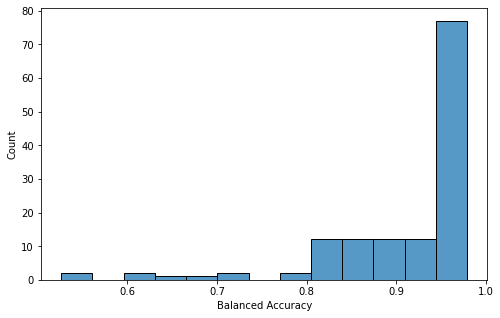

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(clara_df['Balanced Accuracy'])

<AxesSubplot:xlabel='Total Train Time', ylabel='Count'>

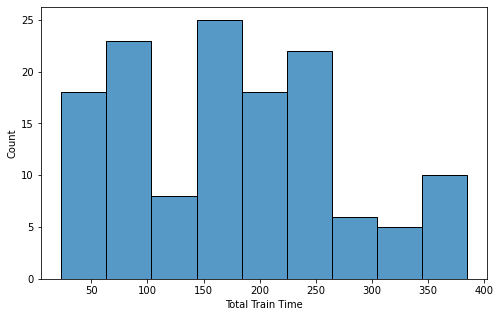

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(clara_df['Total Train Time'])

In [13]:
def get_name(data, col_list):
    res = []
    for i in range (len(data[col_list[0]])):
        row_res = ''
        for col in col_list:
            row_res += data[col][i]+'-'
        res.append(row_res)
    return res

# ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer']|

In [14]:
data_acc = clara_df.sample(frac=1)
# data_acc
data_acc = data_acc.sort_values(by=['Balanced Accuracy', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True]).reset_index(drop=True)
data_acc['Name'] = get_name(data_acc, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])
data_acc[['Combination', 'Name', 'Epoch Count','Median Train Time','Total Train Time',  'Testing Accuracy', 'Testing Sensitivity', 'Testing Specificity', 'Balanced Accuracy']].head(15)

,Combination,Name,Epoch Count,Median Train Time,Total Train Time,Testing Accuracy,Testing Sensitivity,Testing Specificity,Balanced Accuracy
0,11133,resnet18-0-0-0.01-SGD-,20,2.0349,40.6980,0.9667,0.9583,1.0000,0.97915
1,11121,resnet18-0-0-0.0001-RMSprop-,24,2.1456,51.4944,0.9667,0.9583,1.0000,0.97915
2,13313,resnet18-50-2-0.01-Adam-,46,2.7494,126.4724,0.9667,0.9583,1.0000,0.97915
3,11233,resnet18-0-1-0.01-SGD-,23,1.7576,40.4248,0.9583,0.9479,1.0000,0.97395
4,12233,resnet18-25-1-0.01-SGD-,24,3.9199,94.0776,0.9583,0.9479,1.0000,0.97395
5,13323,resnet18-50-2-0.01-RMSprop-,100,2.8300,283.0000,0.9583,0.9479,1.0000,0.97395
6,12311,resnet18-25-2-0.0001-Adam-,19,4.1339,78.5441,0.9500,0.9375,1.0000,0.96875
7,11212,resnet18-0-1-0.001-Adam-,23,2.1245,48.8635,0.9500,0.9375,1.0000,0.96875
8,14212,resnet18-75-1-0.001-Adam-,28,2.8611,80.1108,0.9500,0.9375,1.0000,0.96875
9,12232,resnet18-25-1-0.001-SGD-,100,3.6268,362.6800,0.9500,0.9375,1.0000,0.96875


In [15]:
def fix_clara_com(combinations):
    lr_id = combinations[4]
    opt_id = combinations[3]
    
    return combinations[:3]+lr_id+opt_id

In [16]:
clara_df['Combination_Correct'] = clara_df['Combination'].apply(fix_clara_com)

In [17]:
clara_df = clara_df.sort_values(by='Combination_Correct', ascending=True).reset_index(drop=True)

In [18]:
clara_df.sort_values(by=['Balanced Accuracy', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True])

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy,Combination_Correct
8,11133,resnet18,0,0,0.01,SGD,20,11177538,2.0349,40.6980,0.982849,0.0112,0.1151,0.0747,0.9667,0.968750,0.9583,1.0000,0.97915,11133
1,11121,resnet18,0,0,0.0001,RMSprop,24,11177538,2.1456,51.4944,0.932140,0.0048,0.1305,0.0933,0.9667,0.968750,0.9583,1.0000,0.97915,11112
78,13313,resnet18,50,2,0.01,Adam,46,10657922,2.7494,126.4724,0.727431,0.0257,0.1389,0.1494,0.9667,0.968750,0.9583,1.0000,0.97915,13331
17,11233,resnet18,0,1,0.01,SGD,23,11308354,1.7576,40.4248,1.137915,0.0106,0.1427,0.1057,0.9583,0.963351,0.9479,1.0000,0.97395,11233
44,12233,resnet18,25,1,0.01,SGD,24,11150914,3.9199,94.0776,0.510217,0.0094,0.1376,0.1078,0.9583,0.963351,0.9479,1.0000,0.97395,12233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,11113,resnet18,0,0,0.01,Adam,100,11177538,2.1065,210.6500,0.949442,0.5069,0.4889,0.6044,0.6917,0.784530,0.7292,0.5417,0.63545,11131
25,11323,resnet18,0,2,0.01,RMSprop,100,11340994,1.7525,175.2500,1.141227,0.6378,0.6352,0.6636,0.4083,0.416000,0.2604,1.0000,0.63020,11332
16,11223,resnet18,0,1,0.01,RMSprop,100,11308354,1.7436,174.3600,1.147052,0.6179,0.6069,0.6018,0.6333,0.735632,0.6562,0.5417,0.59895,11232
15,11213,resnet18,0,1,0.01,Adam,100,11308354,2.0456,204.5600,0.977708,0.6592,0.6531,0.6961,0.2500,0.132075,0.0625,1.0000,0.53125,11231


In [32]:
imagenet_df.sort_values(by=['Balanced Accuracy', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True])

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy
17,51233,resnet18,0,1,0.01,SGD,25,11308354,1.4876,37.1900,1.344447,0.0049,0.1144,0.0823,0.9667,0.968750,0.9583,1.0000,0.97915
62,53133,resnet18,50,0,0.01,SGD,27,10494466,1.3905,37.5435,1.438332,0.0036,0.1146,0.1135,0.9667,0.968750,0.9583,1.0000,0.97915
107,54333,resnet18,75,2,0.01,SGD,17,8558210,1.4213,24.1621,1.407162,0.0221,0.1234,0.1036,0.9583,0.963351,0.9479,1.0000,0.97395
44,52233,resnet18,25,1,0.01,SGD,10,11150914,1.4139,14.1390,1.414527,0.0288,0.1095,0.1224,0.9583,0.963351,0.9479,1.0000,0.97395
75,53321,resnet18,50,2,0.001,Adam,22,10657922,1.4363,31.5986,1.392467,0.0066,0.0945,0.1230,0.9583,0.963351,0.9479,1.0000,0.97395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,52313,resnet18,25,2,0.0001,SGD,30,11183554,1.4107,42.3210,1.417736,0.6671,0.7052,0.6274,0.8000,0.881818,1.0000,0.0000,0.50000
15,51231,resnet18,0,1,0.01,Adam,30,11308354,1.4313,42.9390,1.397331,0.6851,0.6881,28.9982,0.8000,0.881818,1.0000,0.0000,0.50000
128,55313,resnet18,100,2,0.0001,SGD,30,164482,1.4580,43.7400,1.371742,0.6655,0.6830,0.6706,0.7667,0.861111,0.9583,0.0000,0.47915
52,52332,resnet18,25,2,0.01,RMSprop,30,11183554,1.4127,42.3810,1.415729,0.6646,0.6447,0.6543,0.5417,0.670520,0.5938,0.3333,0.46355


In [28]:
differences = 0

N = imagenet_df.shape[0]


for i in range(N):
    differences += (clara_df['Balanced Accuracy'][i] - imagenet_df['Balanced Accuracy'][i])

differences/N

-0.02110333333333334

In [29]:
# 11133

In [23]:
resnet_nvidia = {"Training Loss": [0.508671513642652, 0.26719116819012595, 0.1270025438632831, 0.08145055533891701, 0.1495594939433906, 0.06350108618702156, 0.07896525951394115, 0.0523858958388675, 0.02323799017801821, 0.04287088334132136, 0.03011036144492841, 0.03351249722726493, 0.045963944635357724, 0.03200867344778645, 0.062373624057939135, 0.03229864107362597, 0.019034376857899517, 0.019117821661575912, 0.017312868157902873, 0.011187771515010008], "Validation Loss": [2.904470909473508, 1.6795869705288908, 0.3527834058501, 2.1518783292105033, 0.2547844488953435, 0.29802727352741154, 0.18351276028294897, 0.20942665203366168, 0.17827290660420128, 0.28342223202073297, 0.16275326288196929, 0.1765449874449608, 0.17685089156378148, 0.21720793687326964, 0.2025724933591, 0.12089394559260717, 0.5008091739443845, 0.24897411673568015, 0.11513899977124015, 0.14851873169848046]}
resnet_imagenet = {"Training Loss": [0.6782545186429617, 0.11930891485458398, 0.10776324312849696, 0.09459196245035972, 0.07782540036492558, 0.09333847425728438, 0.08002633480242936, 0.05665566196597843, 0.054607797604817224, 0.08503359060988848, 0.0611102565583945, 0.05933283229758701, 0.032610684401359426], "Validation Loss": [1.2060840961545012, 0.9282942552899205, 1.2349952902904777, 0.1045533359743828, 0.2877331854299057, 4.020773499511009, 0.18543782760930616, 0.22226069469091503, 0.10036588217629942, 1.0451871323031048, 0.10266908535430598, 0.2813820812937825, 0.22281787007354026]}
densenet_imagenet = {"Training Loss": [0.4297601811617733, 0.08524035321301725, 0.07619143467411459, 0.10057016004280872, 0.06346893776956213, 0.053185554615868984, 0.0410678845224341, 0.0391043838539935, 0.053400460338915684, 0.038658924260547005], "Validation Loss": [0.10865405292878318, 0.09267584771610969, 0.12593257002705752, 0.31044279212175413, 0.25130773249060606, 0.19504440558511157, 0.09993769107169884, 0.10648431213096131, 0.09967288132323775, 0.07563571094773537]}

epoch_nvidia = [i+1 for i in range(len(resnet_nvidia['Training Loss']))]
epoch_imagenet = [i+1 for i in range(len(resnet_imagenet['Training Loss']))] 
epoch_densenet = [i+1 for i in range(len(densenet_imagenet['Training Loss']))] 

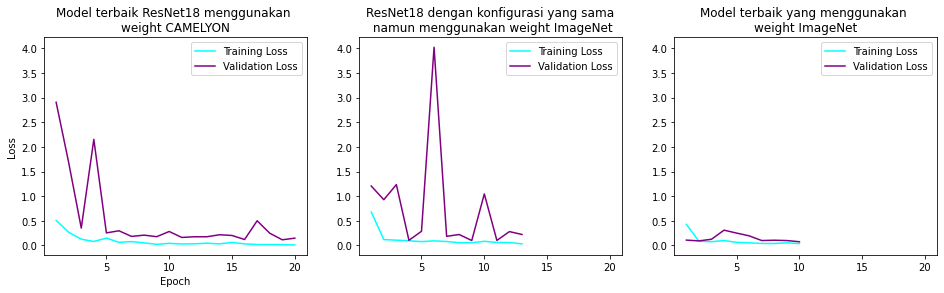

In [24]:
# equivalent but more general
plt.figure(figsize=(16, 4))
plt.margins(x=0.5, y=0.5)
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim([0, 100])
# ax1.set_xlim([-1, 11])
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax1.set_title('Model terbaik ResNet18 menggunakan \nweight CAMELYON')
ax1.plot(epoch_nvidia, resnet_nvidia['Training Loss'], c='cyan', label="Training Loss")
ax1.plot(epoch_nvidia, resnet_nvidia['Validation Loss'], c='purple', label="Validation Loss")
ax1.legend()

# add a subplot with no frame
ax2 = plt.subplot(132, sharex=ax1, sharey=ax1)
ax2.set_title('ResNet18 dengan konfigurasi yang sama\n namun menggunakan weight ImageNet')
ax2.plot(epoch_imagenet, resnet_imagenet['Training Loss'], c='cyan', label="Training Loss")
ax2.plot(epoch_imagenet, resnet_imagenet['Validation Loss'], c='purple', label="Validation Loss")
ax2.legend()

ax3 = plt.subplot(133, sharex=ax1, sharey=ax1)
ax3.set_title('Model terbaik yang menggunakan \nweight ImageNet')
ax3.plot(epoch_densenet, densenet_imagenet['Training Loss'], c='cyan', label="Training Loss")
ax3.plot(epoch_densenet, densenet_imagenet['Validation Loss'], c='purple', label="Validation Loss")
ax3.legend()



plt.show()